In summary, the steps of this process are as follows:

-Model Identification. Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.

-Parameter Estimation. Use a fitting procedure to find the coefficients of the regression model.

-Model Checking. Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.

First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: sales, dtype: float64


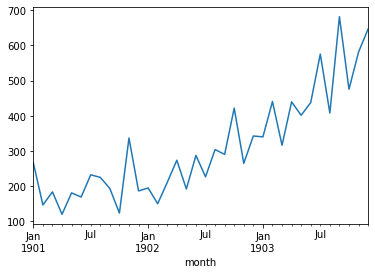

In [87]:
from pandas import read_csv,datetime,DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
s = read_csv('G:\\data science skillathon\\all data\\shampoo data\\sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(s.head())

s.plot()
pyplot.show()



Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

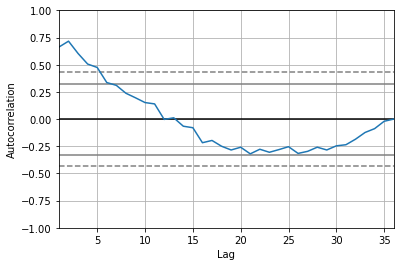

In [88]:
autocorrelation_plot(s)
pyplot.show()

In [89]:
# fit model
model = ARIMA(s, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())



                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 23 Nov 2020   AIC                            406.340
Time:                        15:02:47   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.sales    -0.6203      0.282     

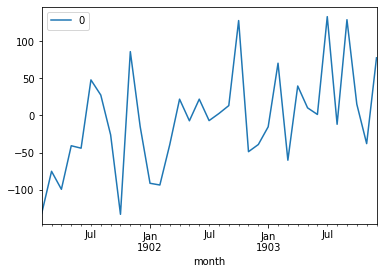

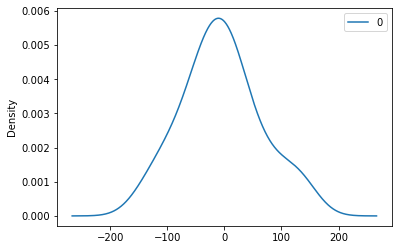

                0
count   35.000000
mean    -5.495229
std     68.132881
min   -133.296625
25%    -42.477894
50%     -7.186601
75%     24.748317
max    133.237953


In [90]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


[266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5 342.3
 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3 646.9]


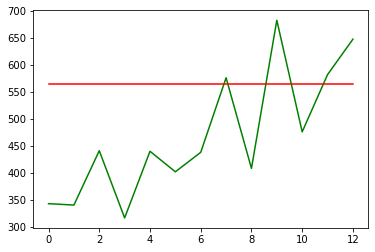

In [99]:
#A method to grid search ARIMA hyperparameters for a one-step rolling forecast.

# Evaluate an ARIMA model for a given order (p,d,q)

X = s.values
print(X)
def evaluate_arima_model(X, arima_order):
    
	# Prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
    
	# Make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		y= model_fit.forecast()[0]
		predictions.append(y)
		history.append(test[t])
        
	# Calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
    # plot
pyplot.plot(test,'green')
pyplot.plot(predictions, color='red')
pyplot.show()

In [100]:
# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

    
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

evaluate_models(s.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.255
ARIMA(0, 0, 2) MSE=23989.527
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.162
ARIMA(0, 1, 2) MSE=6306.682
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18322.577
ARIMA(1, 0, 0) MSE=23112.996
ARIMA(1, 0, 2) MSE=7334.144
ARIMA(1, 1, 0) MSE=7121.368
ARIMA(1, 1, 1) MSE=7003.686
ARIMA(1, 2, 0) MSE=18608.019
ARIMA(2, 0, 0) MSE=10285.453
ARIMA(2, 1, 0) MSE=5689.929
ARIMA(2, 1, 1) MSE=7759.709
ARIMA(2, 2, 0) MSE=9860.947
ARIMA(4, 1, 0) MSE=6649.596
ARIMA(4, 1, 1) MSE=6796.297
ARIMA(4, 2, 0) MSE=7596.325
ARIMA(4, 2, 1) MSE=4694.876
ARIMA(6, 0, 0) MSE=8423.033
ARIMA(6, 1, 0) MSE=6810.073
ARIMA(6, 2, 0) MSE=6261.070
ARIMA(8, 1, 0) MSE=6578.889
ARIMA(10, 1, 0) MSE=7543.348
Best ARIMA(4, 2, 1) MSE=4694.876
